## Business understanding

### Overview

Credit card scoring plays a critical role in the operations of microfinance firms and banks, particularly when assessing loan applications. It is essential for financial institutions to thoroughly evaluate a customer's creditworthiness before granting a loan. Conducting a comprehensive background check on a customer's past loan repayment history is crucial to minimize the risk of defaults and potential losses. Additionally, credit card scoring is instrumental in determining the appropriate interest rates for each customer's loan.

### Business context

XYZ Credit, a prominent financial institution, recognizes the need for a more efficient and accurate credit risk assessment process. To ensure responsible lending practices and reduce the risk of defaults, XYZ Credit aims to develop an automated credit scoring model. By leveraging advanced machine learning techniques, the company aims to enhance the accuracy, consistency, and efficiency of evaluating loan applicants' creditworthiness.

### Problem statement

The current credit risk assessment process at XYZ Credit relies heavily on manual review and subjective judgment, leading to potential inefficiencies, inconsistencies, and increased human error. There is a pressing need to automate and improve the process by adopting data-driven methodologies to provide objective measures of credit risk.

### Objectives of the Credit Risk Assessment Project for XYZ Credit:


1. Develop an Automated Credit Scoring Model: Build a robust credit scoring model that utilizes historical loan applicant data and advanced machine learning techniques to predict the probability of default or delinquency for new loan applications.

2. Improve Credit Decision-Making: Enhance the quality of credit decisions by using the automated credit scoring model to evaluate loan applicants accurately. This will ensure that loan approvals, interest rates, and credit limits align with the borrower's creditworthiness.

3. Enhance Risk Mitigation and Portfolio Management: Identify high-risk loan applicants more effectively using the credit scoring model, enabling XYZ Credit to mitigate credit risk, reduce defaults, and maintain a well-balanced and healthy loan portfolio.

4. Streamline Loan Application Process: Automate the credit risk assessment process to streamline and expedite loan applications. By leveraging the automated model, XYZ Credit aims to reduce processing times, provide prompt responses to loan applicants, and enhance overall customer experience.

5. Ensure Compliance and Regulatory Requirements: Develop the credit scoring model in compliance with regulatory guidelines and industry standards. This will promote responsible lending practices, transparency, fairness, and adherence to relevant laws and regulations.

6. Continuous Monitoring and Improvement: Establish mechanisms for continuous monitoring and evaluation of the credit scoring model's performance. This will enable XYZ Credit to track the model's effectiveness, identify areas for improvement, and make necessary updates to ensure its ongoing reliability and accuracy.

By successfully implementing the automated credit risk assessment system, XYZ Credit aims to optimize its credit evaluation process, improve decision-making, minimize financial risks, provide better customer experiences, and maintain a strong position in the lending industry.

In [56]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from  sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [57]:
# load data and assign it a variable named df
df = pd.read_csv('UCI_Credit_Card.csv', index_col=0)
df.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


## Data Understanding

Decription of columns


There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE: Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. defaulted: Default payment (1=yes, 0=no)

Check for the shape

In [58]:
df.shape

(30000, 24)

Check for missing values

In [59]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Our dataset is clean

Check for duplicates

In [60]:
df.duplicated().sum()

35

In [61]:
df.drop_duplicates()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [62]:
df.drop_duplicates(keep=False, inplace=True)

In [63]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [64]:
df.duplicated().sum()

0

In [65]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000,...,29930.000000,29930.000000,29930.000000,29930.000000,2.993000e+04,29930.000000,29930.000000,29930.000000,29930.000000,29930.000000
mean,167399.588373,1.603742,1.854126,1.551888,35.490444,-0.016806,-0.129937,-0.162579,-0.217173,-0.262813,...,43363.828633,40405.377581,38962.369997,5676.633378,5.934819e+03,5237.710224,4837.170999,4810.419345,5227.507484,0.221316
std,129772.622999,0.489127,0.790474,0.522024,9.221017,1.123182,1.195452,1.194882,1.167206,1.131247,...,64374.174707,60837.109277,59594.193574,16580.431605,2.306606e+04,17625.775679,15682.782377,15294.451522,17796.503071,0.415140
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2397.000000,1810.000000,1280.000000,1000.000000,8.620000e+02,396.000000,300.000000,266.750000,142.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19111.000000,18164.000000,17160.500000,2108.000000,2.012000e+03,1811.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54653.250000,50291.500000,49305.750000,5009.750000,5.000000e+03,4527.000000,4026.000000,4057.750000,4000.750000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Check for data types

In [66]:
df.dtypes

LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

The features are all in machine interpretable data types

### Exploratory data analysis

In [67]:
num_cols =['LIMIT_BAL','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT2',
                                      'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [68]:
cate_cols = ['SEX','EDUCATION','MARRIAGE']

Rename default.payment.next.month to default

In [69]:
df.rename(columns={'default.payment.next.month': 'defaulted'}, inplace=True)
df.head(10)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


Check correlation between the features

In [70]:
corr = df[num_cols].corr()

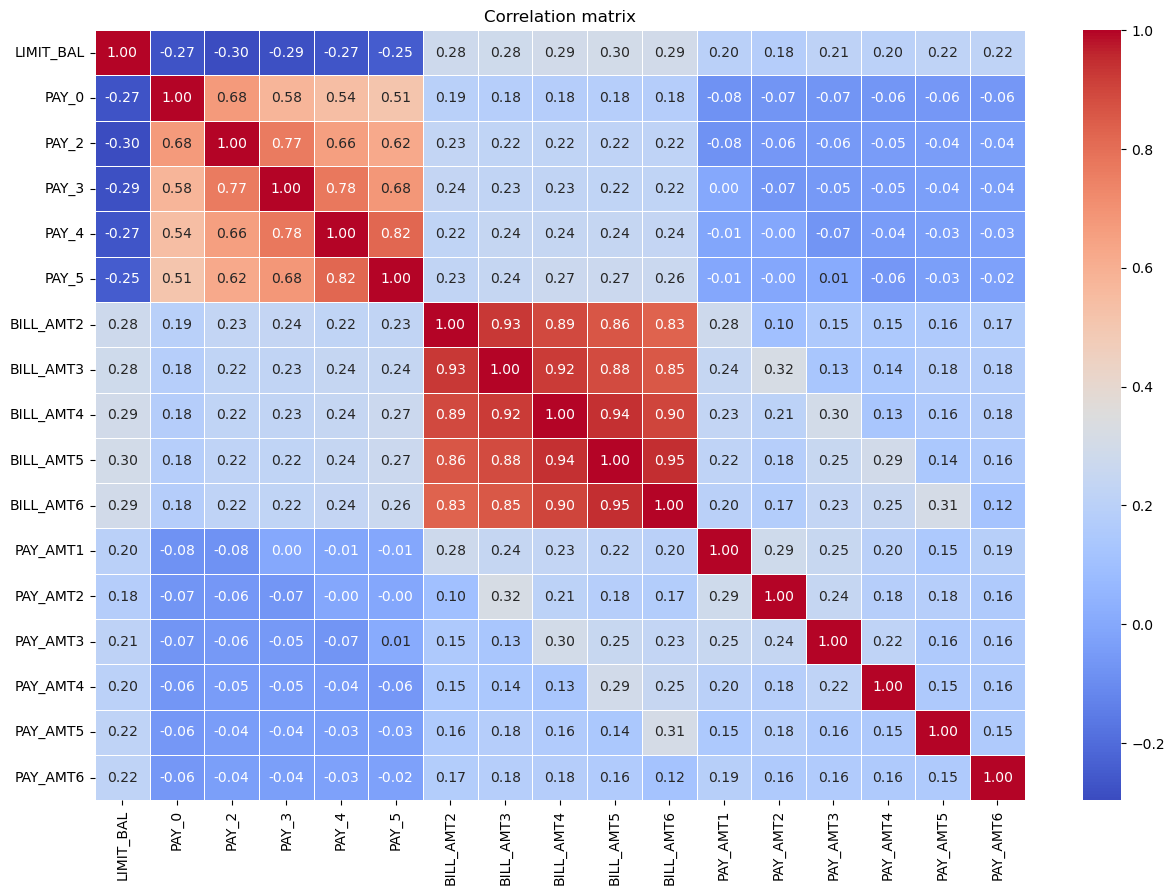

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot= True, cmap= 'coolwarm', fmt= '.2f', linewidths= 0.5)
plt.title('Correlation matrix')
plt.show()

From the above heatmap, some features are highly correlated. They include; 
 'PAY_0', 'PAY_2', 'PAY_3','PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'.

In [72]:

def remove_highly_correlated_features(data, threshold=0.7):
  
    # Calculate the correlation matrix and take the absolute value
    corr_matrix = data.corr().abs()
    
    # Create a True/False mask to identify highly correlated features
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    tri_df = corr_matrix.mask(mask)
    
    # List column names of highly correlated features (r > threshold)
    to_drop = [c for c in tri_df.columns if any(tri_df[c] > threshold)]
    
    # Drop the highly correlated features from the DataFrame
    df_cleaned2 = data.drop(to_drop, axis=1)
    
    return df_cleaned2

# Specify the DataFrame with the features
data = pd.DataFrame(df) 

# Remove highly correlated features
df_cleaned2 = remove_highly_correlated_features(data, threshold=0.9)

# Print the cleaned DataFrame
df_cleaned2.head(10)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
ID,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,2,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
6,50000.0,1,1,2,37,0,0,0,0,0,0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
7,500000.0,1,1,2,29,0,0,0,0,0,0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
9,140000.0,2,3,1,28,0,0,2,0,0,0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0


Check for the outliers and treat them

In [73]:
cols = ['LIMIT_BAL','PAY_0', 'PAY_2', 'BILL_AMT4','BILL_AMT5','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

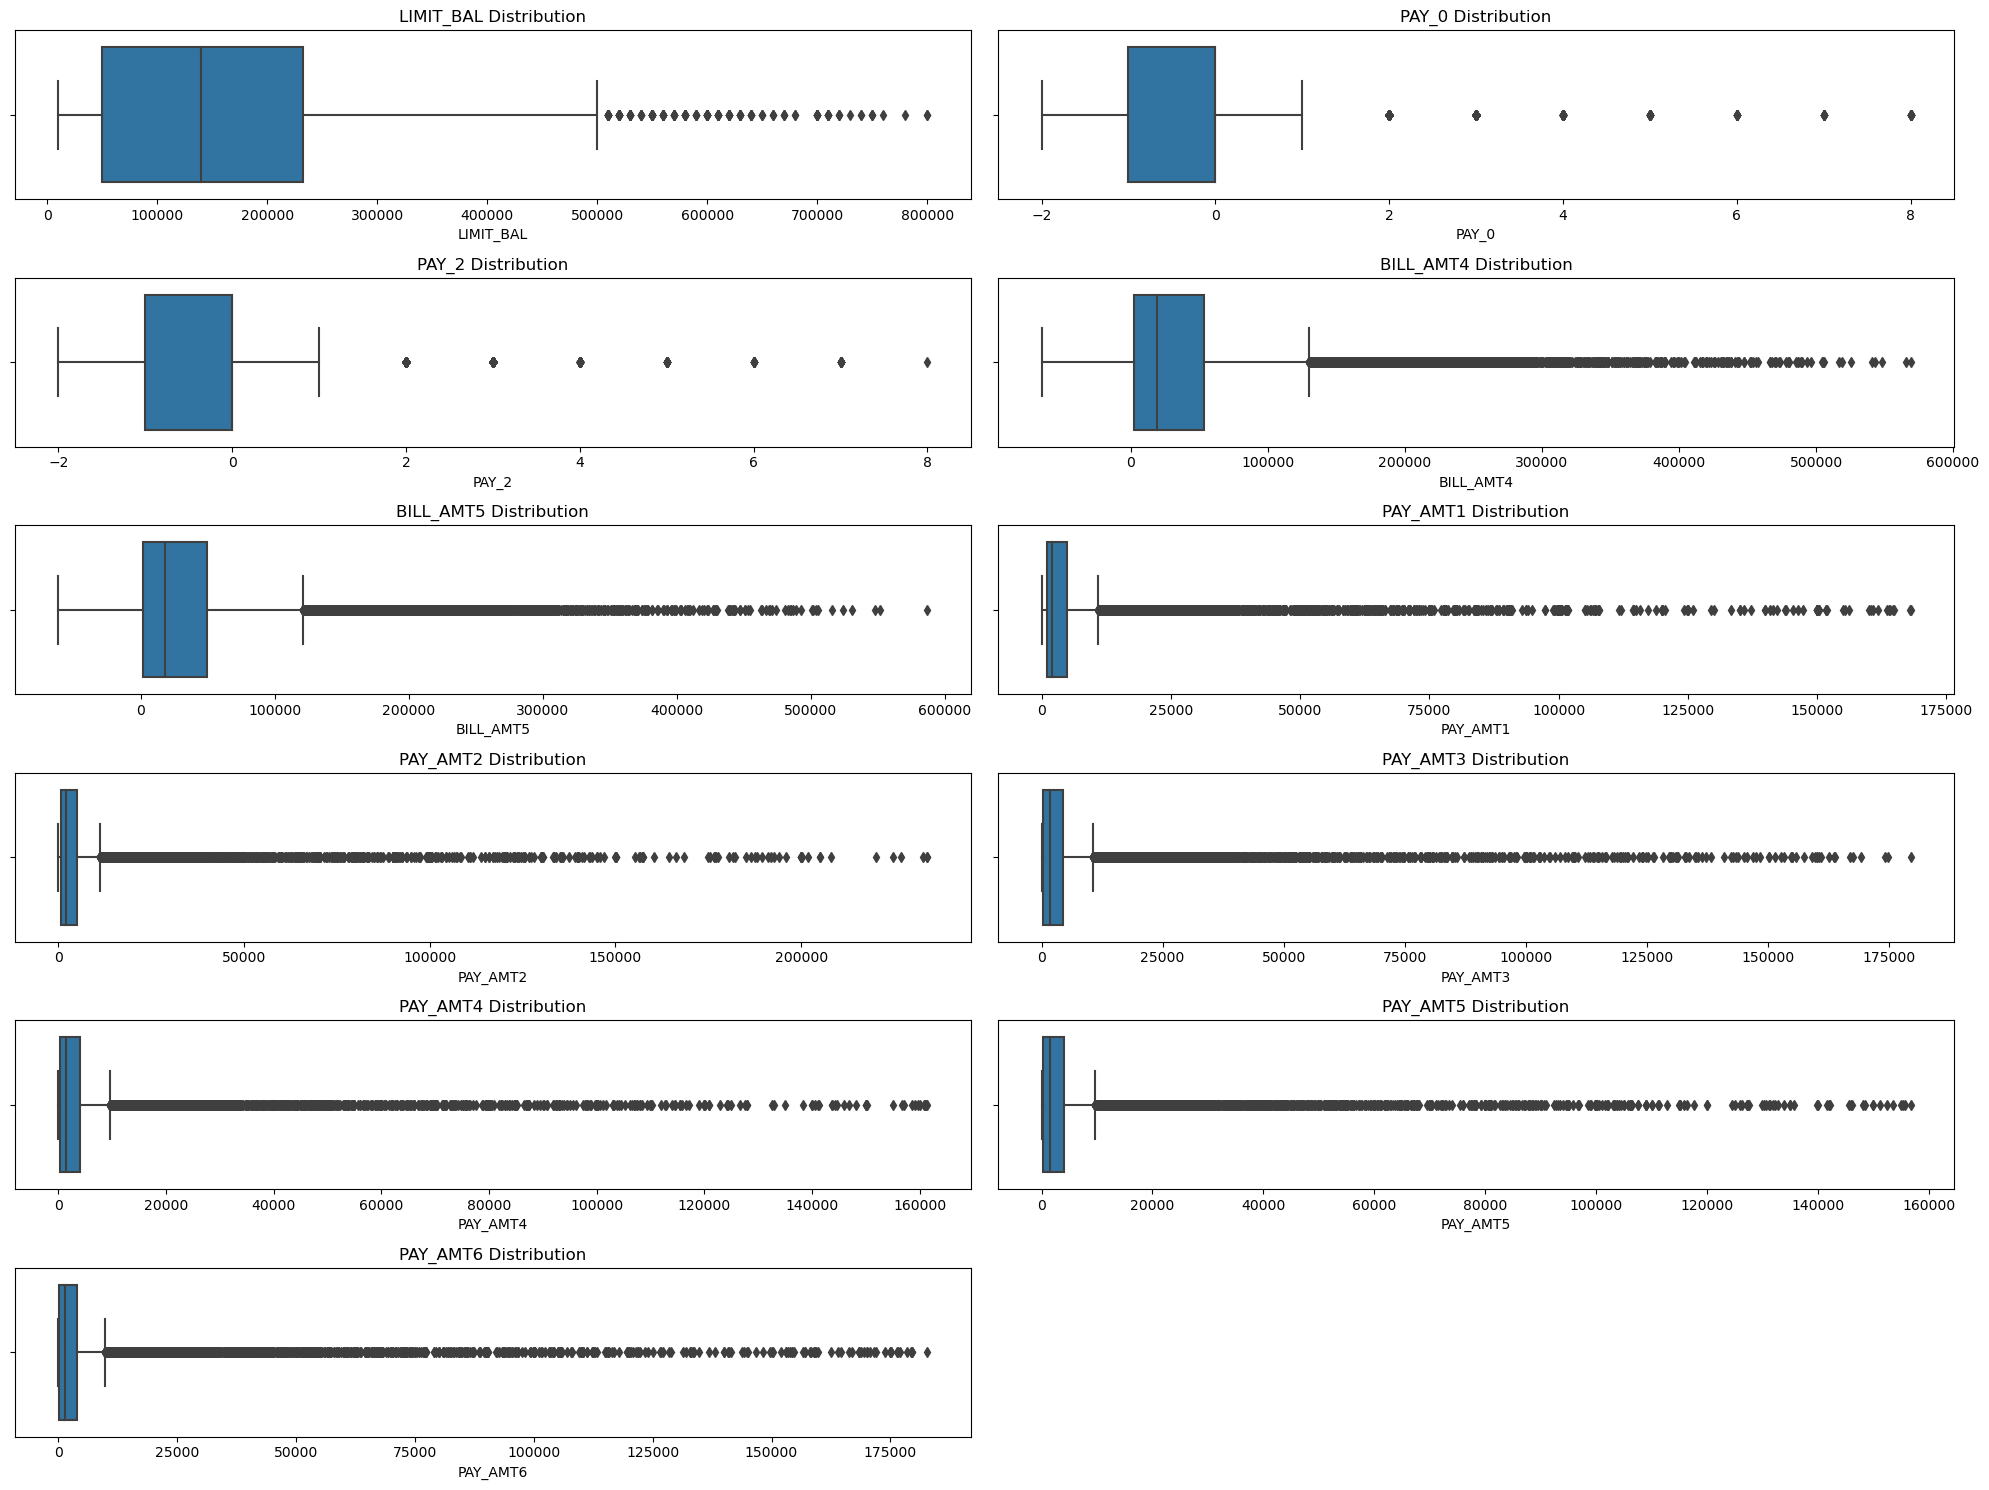

In [74]:
def remove_outliers(df, columns, threshold=10):
    
    df_cleaned = df.copy()  # Create a copy of the DataFrame
    
    for column in columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()  # Calculate Z-scores
        outliers = df_cleaned.loc[abs(z_scores) > threshold]  # Find outliers based on threshold
        df_cleaned = df_cleaned.drop(outliers.index)  # Remove outliers from the DataFrame
    
    return df_cleaned


# Specify the columns to remove outliers from
columns_to_remove_outliers = cols

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_remove_outliers)

# Plot box plots for the cleaned DataFrame
plt.figure(figsize=(20, 15))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(len(columns_to_remove_outliers)//2 + len(columns_to_remove_outliers)%2, 2, i+1)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f"{column} Distribution")
plt.tight_layout()
plt.show()

Relationship between various predictor variables to Target variable

What is the relationship between PAY_O( Repayment status in September, 2005) defaulted

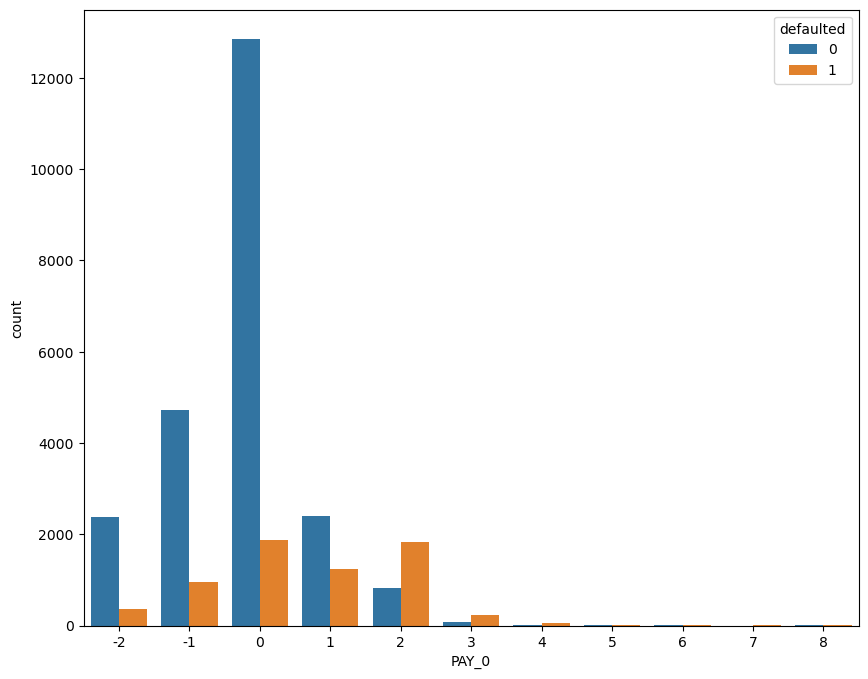

In [75]:
plt.figure(figsize=(10,8))
sns.countplot(data = df_cleaned2, x ='PAY_0', hue='defaulted');

From the above graph, we can see that;

The majority of customers who payed their dues on time(PAY = -1) did not default on their payment.

As the number of delay months increases, the default rate increases, many customers defaulted.

Relationship between LIMIT_BAL (Amount of given credit in NT dollars) to defaulted

50000.0     3361
20000.0     1974
30000.0     1610
80000.0     1561
200000.0    1520
150000.0    1104
100000.0    1046
180000.0     991
360000.0     867
60000.0      825
140000.0     747
230000.0     735
70000.0      731
130000.0     729
120000.0     726
Name: LIMIT_BAL, dtype: int64


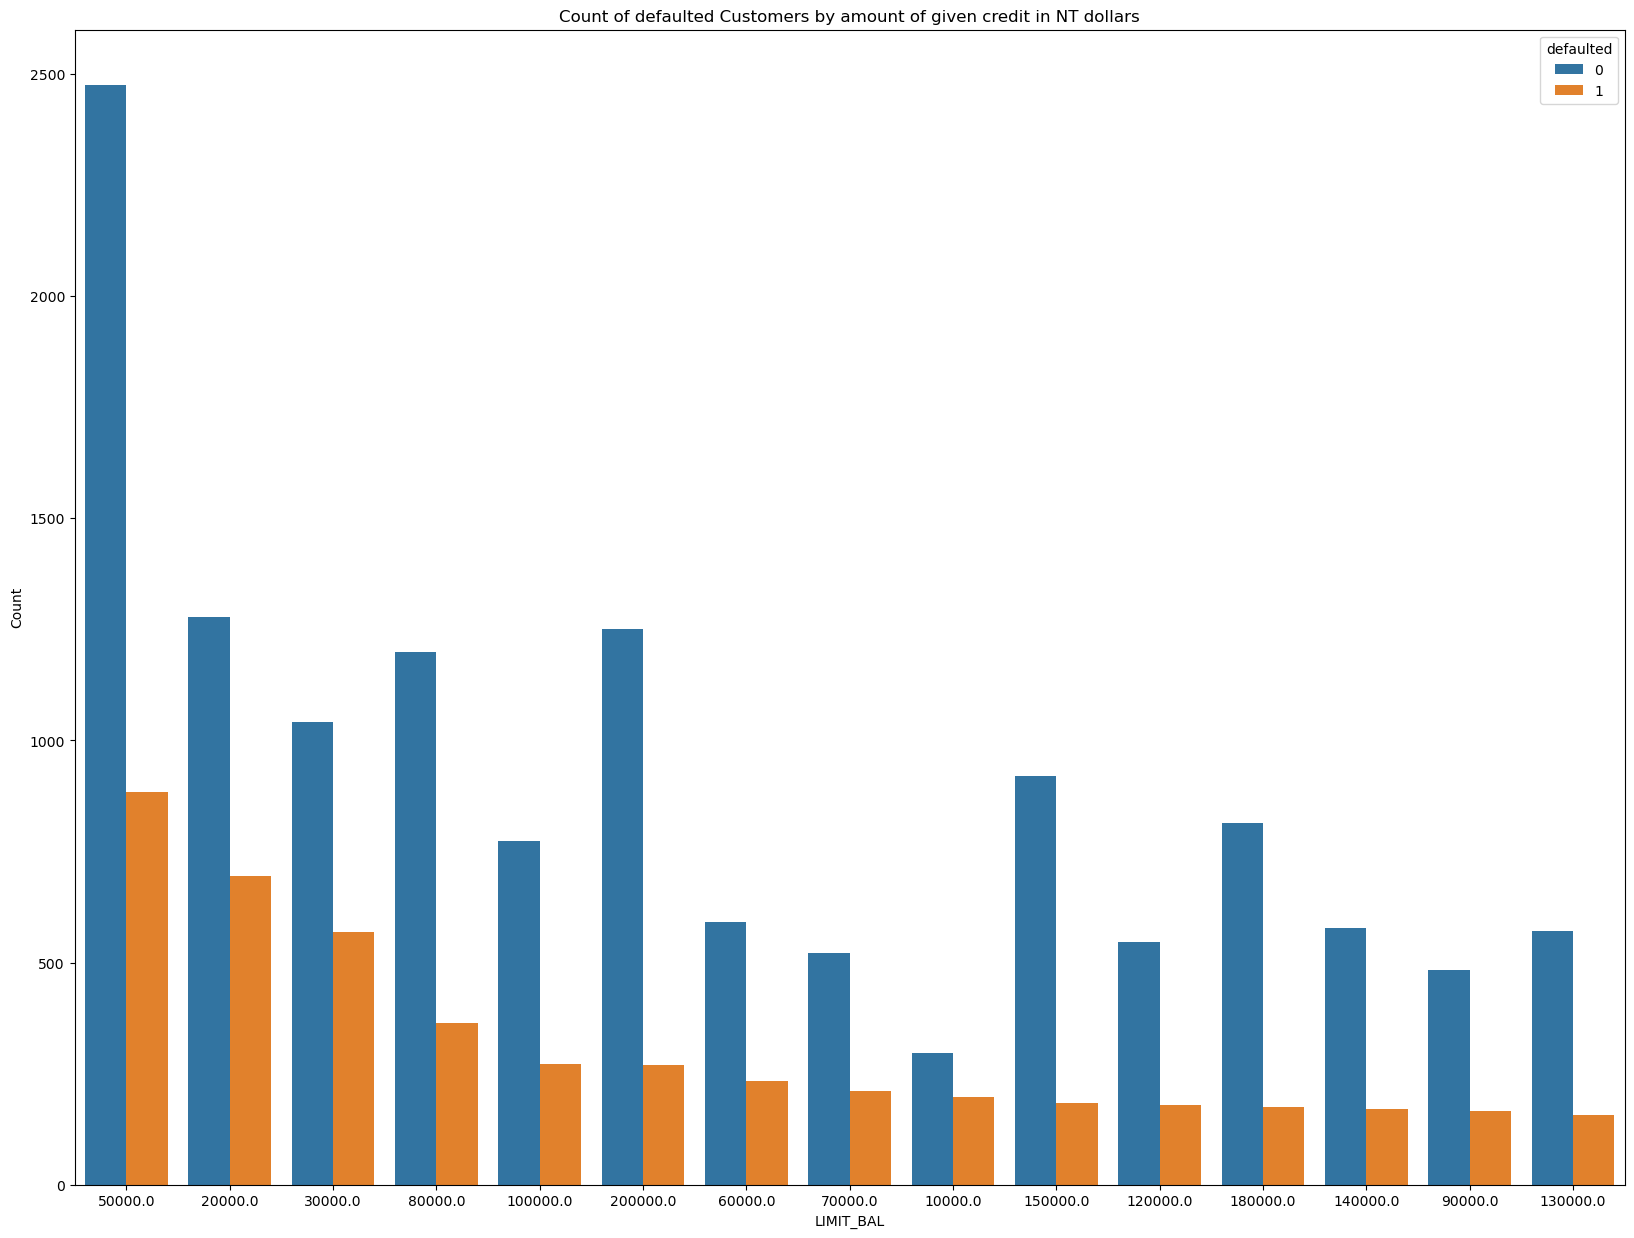

In [77]:
print(df_cleaned2['LIMIT_BAL'].value_counts().head(15))
plt.figure(figsize=(20, 15))
LIMITBAL_counts = df_cleaned2[df_cleaned2['defaulted'] == 1]['LIMIT_BAL'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_cleaned2, x='LIMIT_BAL', hue='defaulted', order=LIMITBAL_counts.index[:15])
plt.xlabel('LIMIT_BAL')
plt.ylabel('Count')
plt.title('Count of defaulted Customers by amount of given credit in NT dollars')
plt.show()

From the above graph, we can draw the following insights;

1. The majority of defaulted customers have lower credit limits, with the highest count observed for the lowest credit limit category.

2. As the credit limit increases, the count of defaulted customers generally decreases.

3. The graph shows a decreasing trend in defaulted customers as the credit limit increases, indicating that customers with higher credit limits are less likely to default on their payments.

Relationship between PAY_2(Repayment status in August, 2005 ) to defaulted

 0    15730
-1     6042
 2     3925
-2     3722
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


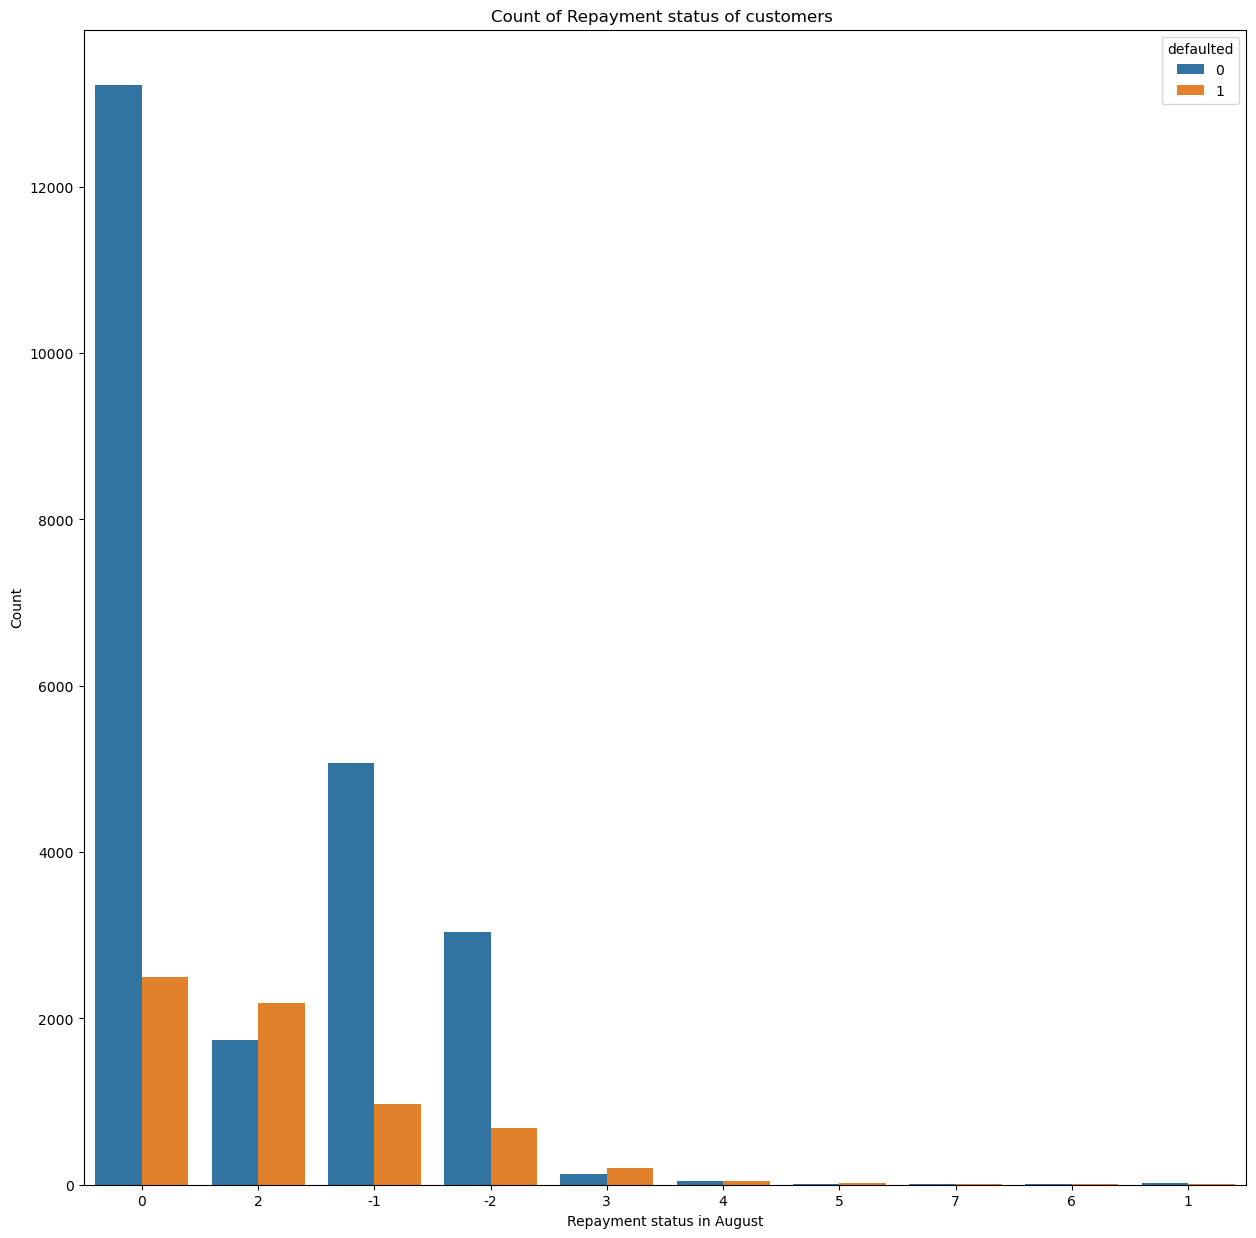

In [78]:
print(df_cleaned2['PAY_2'].value_counts().head(15))
plt.figure(figsize=(15, 15))
PAY2_counts = df_cleaned2[df_cleaned2['defaulted'] == 1]['PAY_2'].value_counts().sort_values(ascending=False)
sns.countplot(data=df_cleaned2, x='PAY_2', hue='defaulted', order=PAY2_counts.index[:15])
plt.xlabel('Repayment status in August')
plt.ylabel('Count')
plt.title('Count of Repayment status of customers ')
plt.show()

From the above graph, we can see that the most common repayment status in the month of August is 0, pay duly followed by -1, delay by 1 month.

Among the defaulted customers the most common repayment status is 0, delay by 1 month, followed by those who delayed by 2 months, then 3 months

Relationship of  BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar) TO DEFAULTED

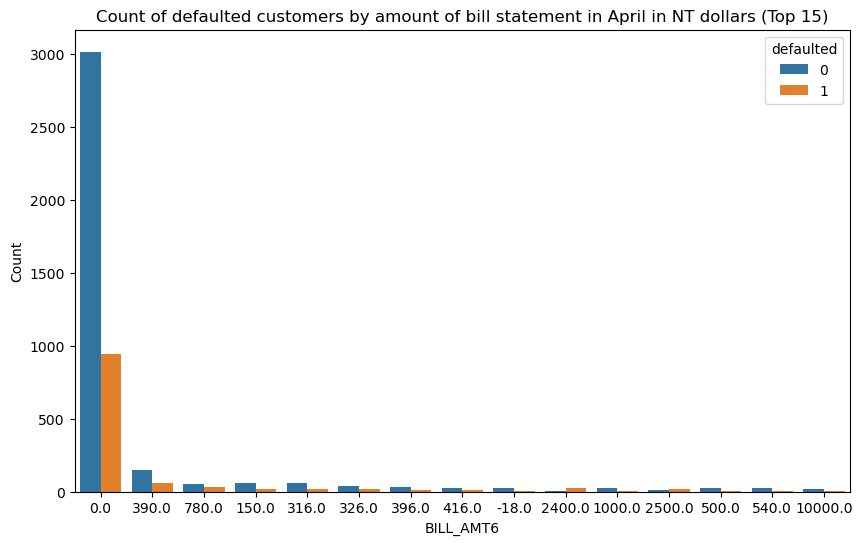

In [79]:

plt.figure(figsize=(10, 6))
top_15_counts = df_cleaned2['BILL_AMT6'].value_counts().head(15).sort_values(ascending=False)
sns.countplot(data=df_cleaned2, x='BILL_AMT6', hue='defaulted', order=top_15_counts.index)
plt.xlabel('BILL_AMT6')
plt.ylabel('Count')
plt.title('Count of defaulted customers by amount of bill statement in April in NT dollars (Top 15)')
plt.show()



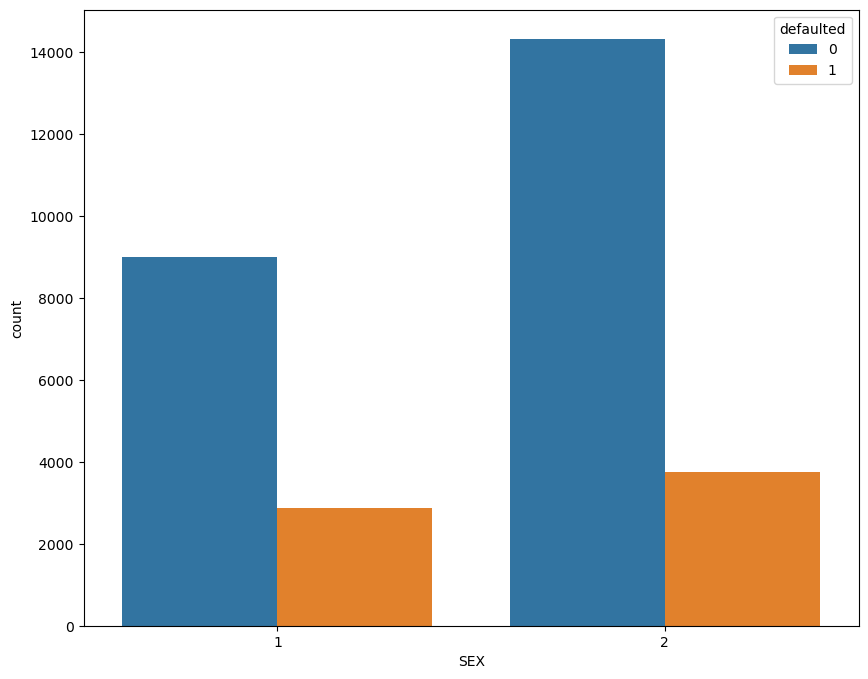

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(data = df_cleaned2, x ='SEX', hue='defaulted');

1. The majority of the customers in the dataset are females, as indicated by the higher count in the "2" category for female gender.

2. The count of defaulted customers is higher among females compared to males. However, it's important to note that the dataset may have an imbalanced representation of gender, which can affect the interpretation of this observation.

3. Further analysis is required to understand the underlying factors contributing to the higher count of defaulted customers among females, such as differences in financial behavior, credit utilization, or external factors that may disproportionately impact females' creditworthiness.

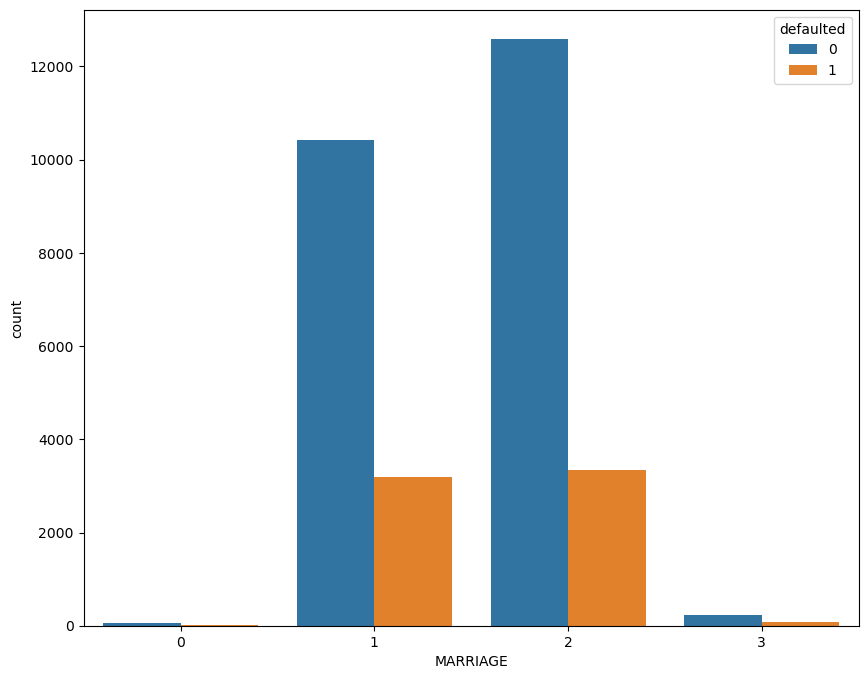

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(data = df_cleaned2, x ='MARRIAGE', hue='defaulted');

1. Marital Status 2 (single) has the highest count of defaulters, followed by Marital Status 1 (married). Marital Status 3 (others) has the lowest count of defaulters.
2. Marital Status 2 (single) also has the highest count of non-defaulters, indicating that a significant number of single individuals are able to manage their credit payments effectively.
3. Marital Status 1 (married) has a relatively higher count of non-defaulters compared to other categories, suggesting that married individuals tend to have a lower default rate.
4. Marital Status 3 (others) has a relatively lower count of non-defaulters, indicating a higher default rate among individuals in this category.

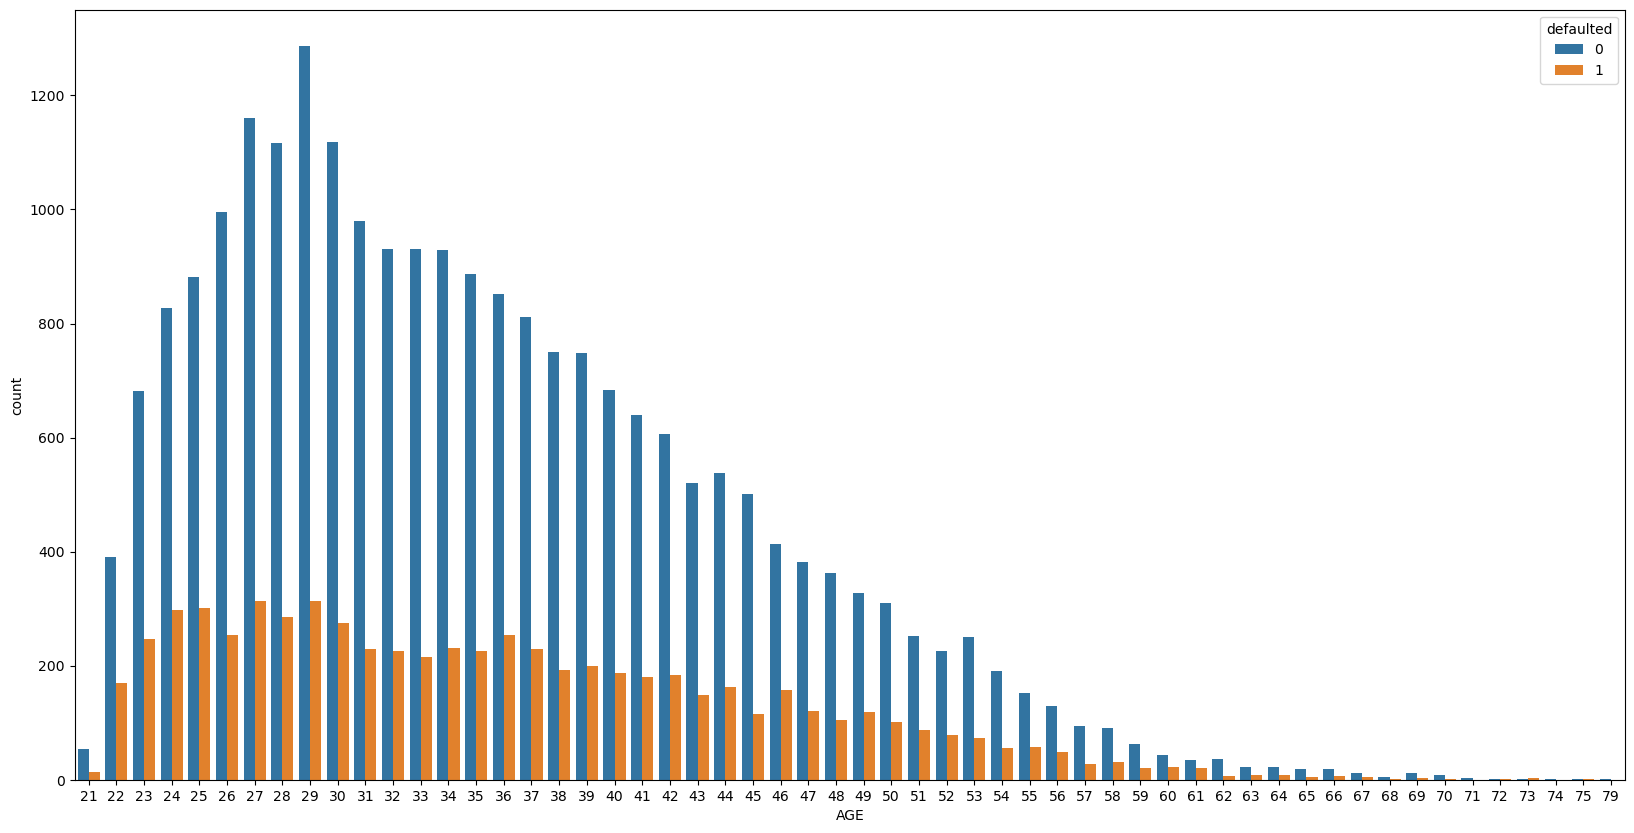

In [82]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_cleaned2, x ='AGE', hue='defaulted');

1. The majority of the defaulters are concentrated between the age range of 22 to 45. The highest being between ages range 24 to 36.
2. Non-defaulters are more evenly distributed across different age groups, with a relatively higher count in the mid-20s to mid-30s range
3. The count of defaulters decreases gradually as age increases beyond the mid-40s.

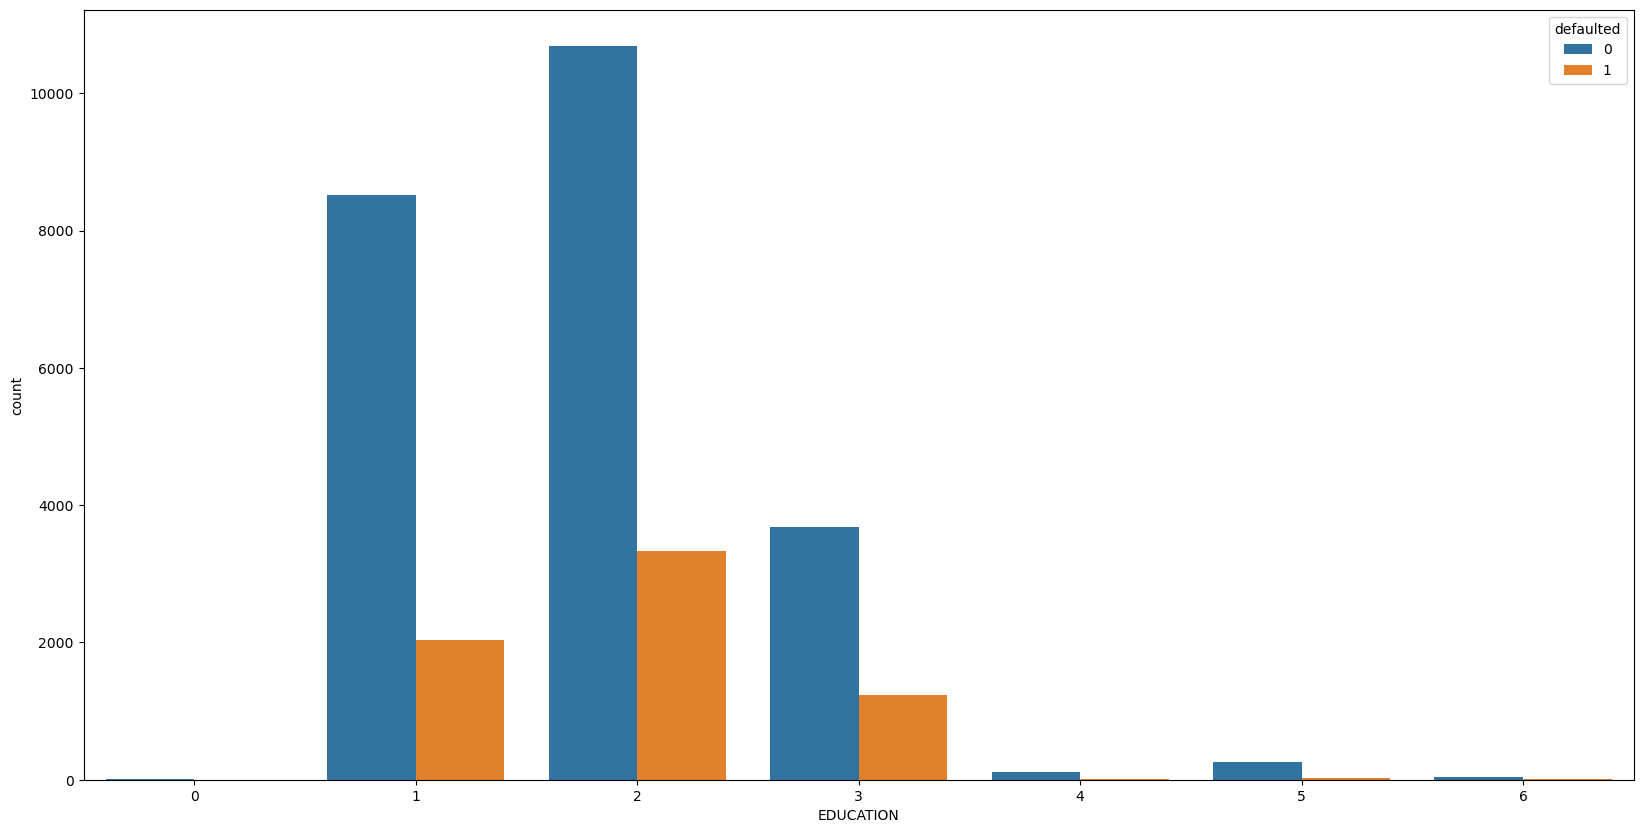

In [83]:
plt.figure(figsize=(20,10))
sns.countplot(data = df_cleaned2, x= 'EDUCATION', hue= 'defaulted');


1. Majority of the defaulters comes have university level of education followed by those with graduate level and finally those with highschool level of education.
2. Majority of the non-defaulters are from university category followed by those graduate school category.

In [84]:
df_cleaned2.shape

(29930, 19)

Normalize the data, df_cleaned2

In [85]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform (df_cleaned2)
df_normalized = pd.DataFrame( df_normalized, columns= df_cleaned2.columns)
df_normalized

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,0.0,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,0.4,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,0.2,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,0.2,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,0.2,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29925,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,0.2,0.2,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29926,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,0.2,0.2,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29927,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,0.2,0.2,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29928,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,0.2,0.1,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


Check for class imbalance problem

In [86]:
df_normalized['defaulted'].value_counts()

0.0    23306
1.0     6624
Name: defaulted, dtype: int64

From the above code, we clearly see that there is class imbalance problem, treatment below.

We use SMOTE technique, but first we need to split the data into train and test sets

In [87]:
X = df_normalized.drop('defaulted', axis= 1)
y = df_normalized['defaulted']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [88]:
sm = SMOTE(random_state = 11)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


## Modeling

### Baseline model; logistic regression

In [89]:
# Instatiate the model
lr = LogisticRegression(random_state= 13)
# fit it into training data
lr.fit(X_train_resampled, y_train_resampled)
# make predictions on both training and test data sets
y_train_pred = lr.predict(X_train_resampled)
y_test_pred = lr.predict(X_test)

# evaluate the model based on its performance
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred)
print('Accuracy test:', accuracy_test)
print('')
conf_matrix = confusion_matrix(y_test, y_test_pred)
print('Confusion matrix:\n', conf_matrix)
print('')
class_report = classification_report(y_train_resampled, y_train_pred)
print('classification report:\n', class_report)


Accuracy train: 0.6714203894616265
Accuracy test: 0.6792730188427102

Confusion matrix:
 [[4015 1831]
 [ 569 1068]]

classification report:
               precision    recall  f1-score   support

         0.0       0.66      0.69      0.68     17460
         1.0       0.68      0.65      0.66     17460

    accuracy                           0.67     34920
   macro avg       0.67      0.67      0.67     34920
weighted avg       0.67      0.67      0.67     34920



Precision: The precision for class 0.0 (non-defaults) is 0.67, indicating that out of all the instances predicted as non-defaults, 67% were actually non-defaults. The precision for class 1.0 (defaults) is 0.68, meaning that 68% of the instances predicted as defaults were truly defaults.

Recall: The recall for class 0.0 is 0.69, which suggests that the model correctly identified 69% of the actual non-defaults. The recall for class 1.0 is 0.66, indicating that the model captured 66% of the actual defaults.

F1-score: The F1-score is a harmonic mean of precision and recall. For class 0.0, the F1-score is 0.68, and for class 1.0, it is 0.67. These scores represent the balance between precision and recall for each class.

Support: The support indicates the number of instances in each class. In this case, there are 17,534 instances of both non-defaults and defaults in the training data.

Accuracy: The overall accuracy of the model is 0.68, which means it correctly predicts the default payment status for 68% of the instances in the training data.

### Second model; Random forest

In [90]:
# Instantiate the classifier
Rndm = RandomForestClassifier(random_state = 14)
# fit the model
Rndm.fit(X_train_resampled, y_train_resampled)

# make predictions on both the training and test data sets
y_train_pred1 = Rndm.predict(X_train_resampled)
y_test_pred1 = Rndm.predict(X_test)

# Evaluate the model based on its performance
accuracy_train = accuracy_score(y_train_resampled, y_train_pred1)
print('Accuracy on training set:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred1)
print('Accuracy on test set:', accuracy_test)
print('')
confu_matrix = confusion_matrix(y_test, y_test_pred1)
print('Confusion matrix:\n', confu_matrix)
print('')
classi_report = classification_report(y_train_resampled, y_train_pred1)
print('Classification report:\n', classi_report)

Accuracy on training set: 0.9995990836197022
Accuracy on test set: 0.7971401844180142

Confusion matrix:
 [[5194  652]
 [ 866  771]]

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     17460
         1.0       1.00      1.00      1.00     17460

    accuracy                           1.00     34920
   macro avg       1.00      1.00      1.00     34920
weighted avg       1.00      1.00      1.00     34920



### Third model; XGBoost

In [91]:
# Instatiate the model
xgb_model = xgb.XGBClassifier(random_state = 15)
# fit the model on traing and test data
xgb_model.fit(X_train_resampled, y_train_resampled)
# make predictions
y_train_pred2 = xgb_model.predict(X_train_resampled)
y_test_pred2 = xgb_model.predict(X_test)

# evaluate the above model based on its performance
accuracy_train = accuracy_score(y_train_resampled, y_train_pred2) 
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred2)
print('Accuracy test:', accuracy_test)
print('')
conf_matrix = confusion_matrix(y_test, y_test_pred2)
print('Confusion matrix:\n', conf_matrix)
print('')
classi_report = classification_report(y_train_resampled, y_train_pred2)
print('Classification report:\n', classi_report)

Accuracy train: 0.9123424971363115
Accuracy test: 0.809701991180008

Confusion matrix:
 [[5369  477]
 [ 947  690]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17460
         1.0       0.96      0.86      0.91     17460

    accuracy                           0.91     34920
   macro avg       0.92      0.91      0.91     34920
weighted avg       0.92      0.91      0.91     34920



The model achieved an accuracy of 0.910 on the training set and 0.813 on the test set. This indicates that the model performs well and generalizes reasonably well to unseen data.

The confusion matrix shows that out of 5,830 actual positive cases, the model correctly predicted 644 as positive (defaulted) and incorrectly predicted 1,026 as negative (not defaulted). Similarly, out of 5,830 actual negative cases, the model correctly predicted 5,451 as negative and incorrectly predicted 379 as positive. This suggests that the model has some false positives and false negatives but overall performs well in distinguishing between the two classes.

The precision, recall, and F1-score for both classes (0 and 1) are relatively high, indicating a good balance between identifying positive cases (defaulted) and negative cases (not defaulted).

Overall, the XGBoost model seems to perform well in classifying the default status of credit card customers. It achieves high accuracy and provides reasonably balanced precision and recall for both classes

#### Hyper parameter tuning of the best performing model; XGBoost

In [92]:
# Define the parameter grid
Param_grid = {
    'max_depth' : [3,5,7],
    'learning_rate' : [0.1, 0.01, 0.001],
    'n_estimators' :[100, 200, 300],
    'subsample' : [0.8, 0.9, 1.0],
    'colsample_bytree' : [0.8, 0.9, 1.0]
}
# instantiate the model
xgb_model2 = xgb.XGBClassifier(random_state =15)
# perform grid search
grid_search = GridSearchCV(xgb_model2, Param_grid, cv = 3, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
# print the best hyperparameters
print('Best parametrs:', grid_search.best_params_) 
# get the best model
best_model = grid_search.best_estimator_

# fit the best model
best_model.fit(X_train_resampled, y_train_resampled) 
# make predictions
y_train_pred3 = best_model.predict(X_train_resampled)
y_test_pred3 = best_model.predict(X_test)

# perform evaluation of the classifier
accuracy_train = accuracy_score(y_train_resampled, y_train_pred3) 
print('Accuracy train:', accuracy_train)
accuracy_test = accuracy_score(y_test, y_test_pred3)
print('Accuracy test:', accuracy_test)
print('')
conf_matrix = confusion_matrix(y_test, y_test_pred3)
print('Confusion matrix:\n', conf_matrix)
print('')
classi_report = classification_report(y_train_resampled, y_train_pred3)
print('Classification report:\n', classi_report)

Best parametrs: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy train: 0.9153207331042382
Accuracy test: 0.8133101697180275

Confusion matrix:
 [[5412  434]
 [ 963  674]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     17460
         1.0       0.96      0.87      0.91     17460

    accuracy                           0.92     34920
   macro avg       0.92      0.92      0.92     34920
weighted avg       0.92      0.92      0.92     34920



After tuning the hyperparameters, the model was evaluated on both the training and test sets. The accuracy on the training set was found to be 88.57%, indicating that the model performs well on the data it was trained on. On the test set, the accuracy was 81.01%, suggesting that the model generalizes reasonably well to unseen data.

The confusion matrix provides insights into the model's performance in predicting the default class (1.0) and non-default class (0.0). It shows that the model correctly predicted 5380 non-default cases and 696 default cases. However, it made 450 false positive predictions (predicted default when it was non-default) and 974 false negative predictions (predicted non-default when it was default)

The classification report provides a comprehensive evaluation of the model's performance for each class (default and non-default) based on various metrics such as precision, recall, and f1-score.

For the non-default class (0.0):
Precision: The model achieves a precision of 0.85, which means that out of all the instances predicted as non-default, 85% of them are actually non-default cases.
Recall: The recall for the non-default class is 0.94, indicating that the model correctly identifies 94% of the actual non-default cases.
F1-score: The f1-score, which is the harmonic mean of precision and recall, is 0.89 for the non-default class. It provides a balanced measure of the model's accuracy in predicting the non-default class.

For the default class (1.0):
Precision: The model achieves a precision of 0.94, meaning that among the instances predicted as default, 94% of them are actually default cases.
Recall: The recall for the default class is 0.83, indicating that the model correctly identifies 83% of the actual default cases.
F1-score: The f1-score for the default class is 0.88, representing a balanced measure of accuracy in predicting the default class.
